In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

import notes_tools.tools as tools
from notes_tools.tools.df_marks_manip import round_half_point

In [2]:
ws = tools.get_class_ws("312")
flat = tools.extract_flat_marks(ws)

In [3]:
quest_pov, exo_pov, eval_pov = tools.digest_flat_df(flat)

In [4]:
#eval_pov["Nom"].unique()

## All in

In [5]:
eval_pov[eval_pov["Nom"] == "DM2"][["Eleve","Date","Bareme", "Mark"]]


Eleve       Date  Bareme  Mark
6            ABDALLAH Elza 2016-11-14      13  11.5
15      ABDALLAH Nourayina 2016-11-14      13  10.5
24         ABDALLAH Roukia 2016-11-14      13   4.5
33           AHAMADI Laila 2016-11-14      13  11.0
42           AHAMADI Satti 2016-11-14      13   6.5
51         AHAMED El-Fahad 2016-11-14      13   0.0
60           AHMED Nachmie 2016-11-14      13   9.5
69    ALI ABDALLAH Raphael 2016-11-14      13   8.0
78       ATTOUMANE Nasrati 2016-11-14      13   9.0
87       ATTOUMANE Nedjima 2016-11-14      13  11.5
96         DARKAOUI Issouf 2016-11-14      13   0.0
105        DHOIMIR Hidayat 2016-11-14      13   3.5
114     DJAMAL Hounaissati 2016-11-14      13   7.0
123        DJANFAR Houmadi 2016-11-14      13   0.0
132    FAIZ Aoufi Youssouf 2016-11-14      13   1.5
141         HAMZA El-Hadji 2016-11-14      13   8.0
150        HOUFRANE Soirta 2016-11-14      13  12.0
159         IBRAHIM Hindou 2016-11-14      13   0.0
168       IBRAHIM Rouiyati 2016-11-14      13   9.0
177          ISSOUF Toifia 2016-11-14      13   8.5
186        MOADJO Hachimia 2016-11-14      13   3.0
195     MOHAMED Abderemane 2016-11-14      13   7.5
204  MOHAMED Nadhir-Eddine 2016-11-14      13  10.5
213           MOUSSA Faize 2016-11-14      13   0.0
222            SAID Fatima 2016-11-14      13  10.5
231           SAID Ramiati 2016-11-14      13   0.0
240             SAÏD Latif 2016-11-14      13   0.0
249       YOUSSOUF Ouldine 2016-11-14      13  10.0

------

# Conn


In [6]:
quest_conn = quest_pov[quest_pov["Nom"].str.contains("Conn")]
exo_conn = exo_pov[exo_pov["Nom"].str.contains("Conn")]
eval_conn = eval_pov[eval_pov["Nom"].str.contains("Conn")]

In [7]:
#eval_conn["Normalized"] = eval_conn["Mark"] / eval_conn["Bareme"]
eval_conn["NonZero"] = (eval_conn["Mark"] != 0).astype(int)

/home/lafrite/.virtualenvs/enseignement/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [8]:
conn_sum = eval_conn.groupby("Eleve").sum()

In [9]:
conn_sum["Final"] = (conn_sum["Normalized"] / conn_sum["NonZero"] * 20).apply(round_half_point)

Analyse de notes finales des devoirs de connaissances

In [10]:
conn_sum["Final"].describe()

count    26.000000
mean     11.615385
std       3.832252
min       2.500000
25%       9.375000
50%      12.250000
75%      13.875000
max      18.000000
Name: Final, dtype: float64

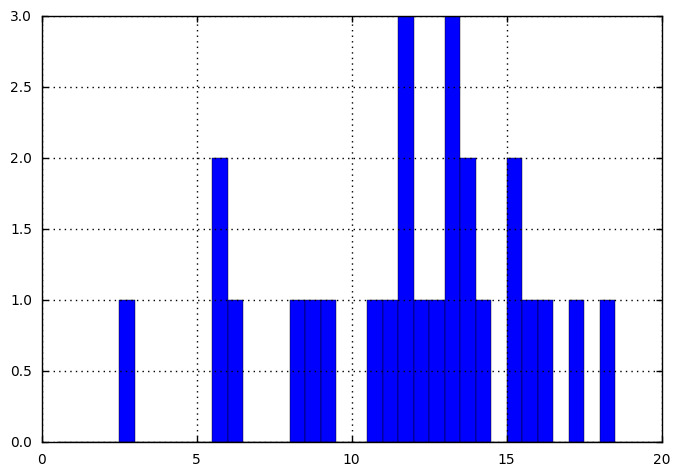

In [11]:
conn_sum["Final"].hist(bins = 40, range = (0,20))

Analyse de l'évolution sur le temps pour chaque élève

In [12]:
#exo_conn["Normalized"] = exo_conn["Mark"] / exo_conn["Bareme"]

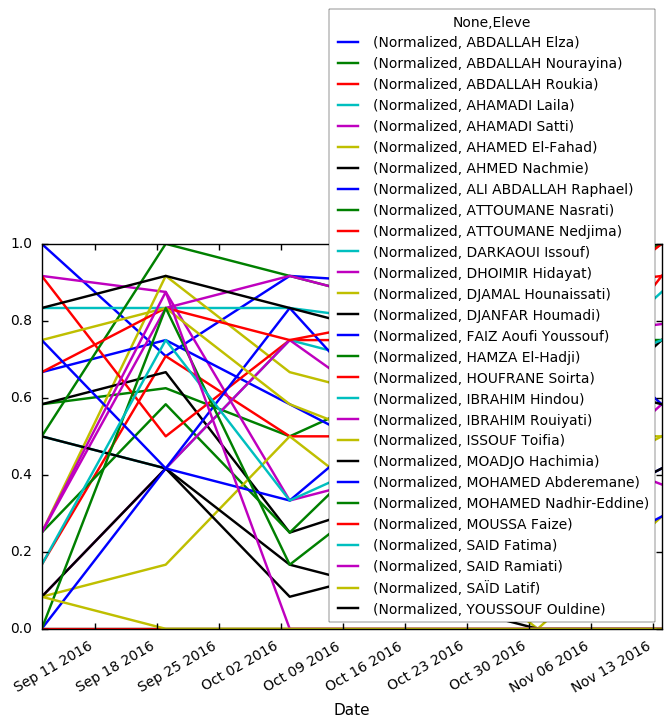

In [13]:
pd.pivot_table(exo_conn,
               index = ["Date"],
               values = ["Normalized"],
               columns = ["Eleve"],
               ).plot()

------------
## DM1

-------------
## DS1

-------------------
## DS2

In [14]:
quest_DS2, exo_DS2, eval_DS2 = tools.select_eval(quest_pov, exo_pov, eval_pov, "DS2")

In [15]:
abs_pres = tools.get_present_absent(eval_DS2)
absents = abs_pres["absents"]
presents = abs_pres["presents"]

Absents

In [16]:
for a in absents:
    print(a)

IBRAHIM Hindou
MOUSSA Faize
SAID Ramiati
SAÏD Latif


In [17]:
# On enlève les absents
quest_DS2, exo_DS2, eval_DS2 = tools.keep_only_presents(quest_DS2, exo_DS2, eval_DS2, presents)

### Vision globale

In [18]:
eval_DS2["Mark"].describe()

count    24.000000
mean     11.083333
std       3.052678
min       2.500000
25%       9.500000
50%      11.250000
75%      13.125000
max      16.000000
Name: Mark, dtype: float64

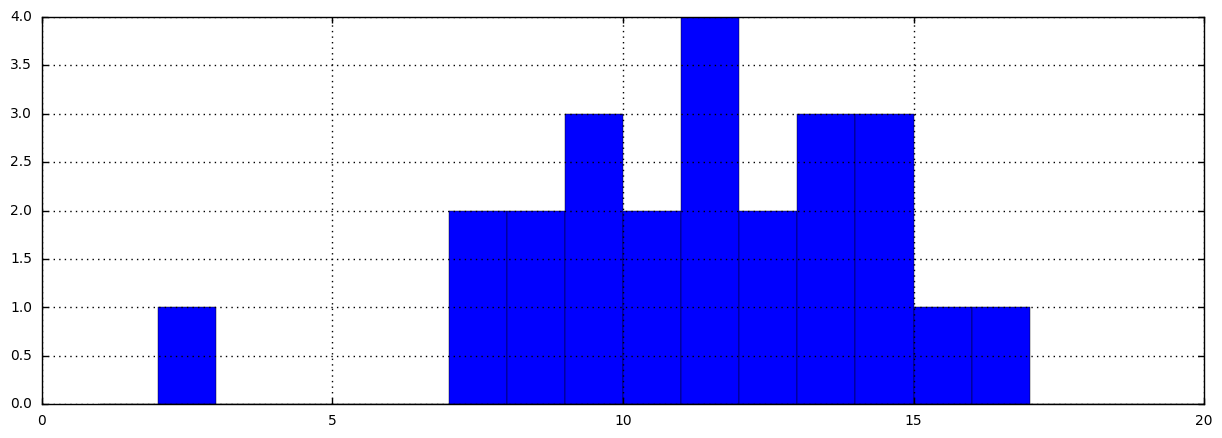

In [19]:
eval_DS2["Mark"].hist(bins = 20, range = (0,20), figsize = (15,5))

### Diagramme en boite par exercice

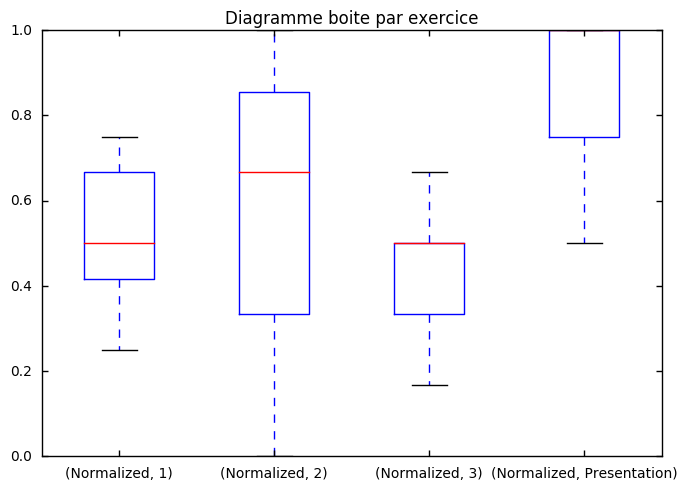

In [20]:
pd.pivot_table(exo_DS2,
              index = ["Eleve"],
               values = ["Normalized"],
               columns = ["Exercice"]
              ).plot.box(title="Diagramme boite par exercice")

### Questions mieux/moins réussites

In [21]:
def question_uniq_formater(row):
    ans = ""
    try:
        int(row['Exercice'])
    except ValueError:
        ans += str(row["Exercice"])
    else:
        ans += "Ex"+str(row["Exercice"])
        
    try:
        int(row["Question"])
    except ValueError:
        if not pd.isnull(row["Question"]):
            ans += str(row["Question"])
    else:
        ans += "Qu"+str(row["Question"])
    
    if not pd.isnull(row["Commentaire"]):
        ans += " ({})".format(row["Commentaire"])
    return ans
    

In [22]:
#quest_DS2["Uniq_quest"] = quest_DS2.apply(question_uniq_formater, axis=1)

In [23]:
#quest_DS2["Normalized"] = quest_DS2["Mark"] / quest_DS2["Bareme"]

In [24]:
quest = quest_DS2.groupby(["Uniq_quest"]).mean()["Normalized"].copy()

In [25]:
quest.sort()

/home/lafrite/.virtualenvs/enseignement/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  if __name__ == '__main__':


In [26]:
quest

Uniq_quest
Exo3 Qu3 (Réduire l'expression)    0.027778
Exo3 Qu2 (Créer des formules)      0.125000
Exo1 Qu3 (Problème Fraction)       0.236111
Exo1 Qu1 (Création Fractions)      0.388889
Exo2  (Calculs)                    0.583333
Exo2  (Communication)              0.597222
Exo2  (Connaissance de Thalès)     0.611111
Exo1 Qu2 (Calculs Fractions)       0.750000
Exo3 Qu1 (Remplir le tableau)      0.750000
Presentation                       0.802083
Name: Normalized, dtype: float64

#### Exo 1
Le calcul avec les fractions semble ok. 
Par contre le problème avec les fractions n'est pas du tout réussi. 
#### Exo 2
Plutôt décevant. Aucune des 3 choses attendues ne ressort comme plus problématique que les autres.
#### Exo 3
Comme prévu, les questions sur les conjectures est très peu réussi.
Par contre le tableau est relativement bien rempli.

### Élèves à surveiller par exercice

In [27]:
inquietant = exo_DS2[exo_DS2["Normalized"] < 0.4]

In [28]:
pd.pivot_table(inquietant,
              index = ["Exercice", "Eleve"],
              values = ["Mark", "Bareme"])

Bareme  Mark
Exercice     Eleve                              
1            ABDALLAH Roukia             6   2.0
             AHAMADI Satti               6   1.5
             DJAMAL Hounaissati          6   2.0
             DJANFAR Houmadi             6   1.5
2            ABDALLAH Nourayina          6   2.0
             AHAMED El-Fahad             6   0.0
             AHMED Nachmie               6   1.5
             DHOIMIR Hidayat             6   1.5
             DJANFAR Houmadi             6   0.0
             FAIZ Aoufi Youssouf         6   2.0
             IBRAHIM Rouiyati            6   2.0
3            ABDALLAH Nourayina          6   2.0
             ABDALLAH Roukia             6   2.0
             AHAMADI Satti               6   2.0
             DARKAOUI Issouf             6   1.0
             DHOIMIR Hidayat             6   2.0
             DJAMAL Hounaissati          6   1.0
             DJANFAR Houmadi             6   1.0
             FAIZ Aoufi Youssouf         6   2.0
             MOADJO Hachimia             6   2.0
             MOHAMED Nadhir-Eddine       6   1.0
Presentation DJANFAR Houmadi             2   0.0
             MOHAMED Abderemane          2   0.0
             SAID Fatima                 2   0.0

-------
## DM2

In [29]:
quest_DM2, exo_DM2, eval_DM2 = tools.select_eval(quest_pov, exo_pov, eval_pov, "DM2")

In [30]:
abs_pres = tools.get_present_absent(eval_DM2)
absents = abs_pres["absents"]
presents = abs_pres["presents"]

In [31]:
print("Non rendus")
for e in absents:
    print(e)

Non rendus
AHAMED El-Fahad
DARKAOUI Issouf
DJANFAR Houmadi
IBRAHIM Hindou
MOUSSA Faize
SAID Ramiati
SAÏD Latif


In [32]:
# On enlève les absents
quest_DM2, exo_DM2, eval_DM2 = tools.keep_only_presents(quest_DM2, exo_DM2, eval_DM2, presents)

### Vision globale

In [33]:
print("Devoir sur {}".format(eval_DM2["Bareme"].iloc[0]))

Devoir sur 13.0


In [34]:
eval_DM2["Mark"].describe()

count    21.000000
mean      8.238095
std       2.990063
min       1.500000
25%       7.000000
50%       9.000000
75%      10.500000
max      12.000000
Name: Mark, dtype: float64

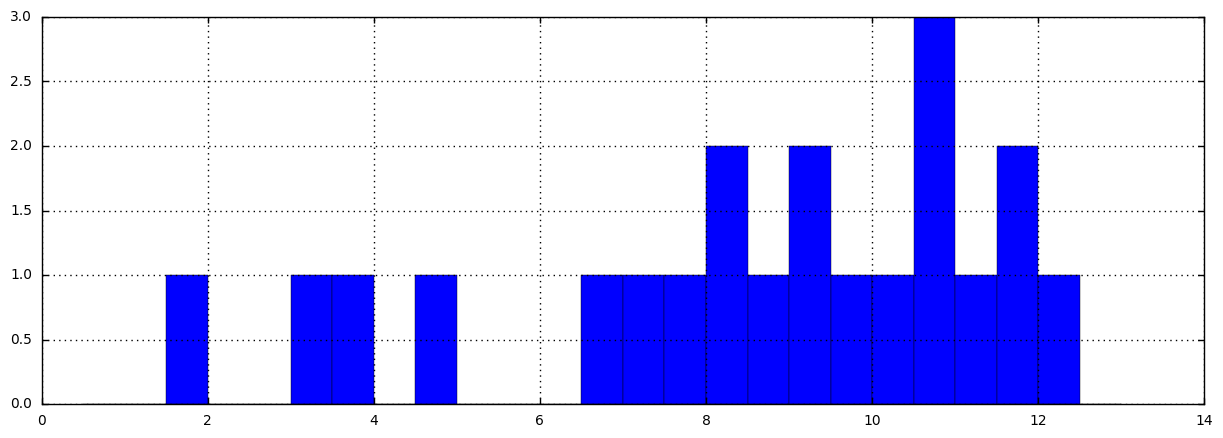

In [35]:
eval_DM2["Mark"].hist(bins = 26, range = (0,13), figsize = (15,5))

### Diagramme par exercice

/home/lafrite/.virtualenvs/enseignement/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


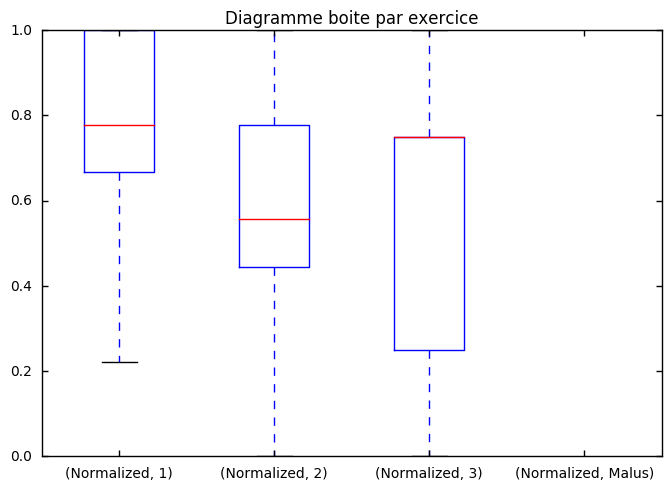

In [36]:
pd.pivot_table(exo_DM2,
              index = ["Eleve"],
               values = ["Normalized"],
               columns = ["Exercice"]
              ).plot.box(title="Diagramme boite par exercice")

### Questions moins/mieux réussites

In [37]:
quest = quest_DS2.groupby(["Uniq_quest"]).mean()["Normalized"].copy()

In [38]:
quest.sort()

/home/lafrite/.virtualenvs/enseignement/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  if __name__ == '__main__':


In [39]:
quest

Uniq_quest
Exo3 Qu3 (Réduire l'expression)    0.027778
Exo3 Qu2 (Créer des formules)      0.125000
Exo1 Qu3 (Problème Fraction)       0.236111
Exo1 Qu1 (Création Fractions)      0.388889
Exo2  (Calculs)                    0.583333
Exo2  (Communication)              0.597222
Exo2  (Connaissance de Thalès)     0.611111
Exo1 Qu2 (Calculs Fractions)       0.750000
Exo3 Qu1 (Remplir le tableau)      0.750000
Presentation                       0.802083
Name: Normalized, dtype: float64

#### Exo 1 (calculs avec des fractions)
C'est convenable même si l'addition de fraction est à retravailler.

#### Exo 2 (exercice technique avec Thalès)
La rédaction commence à rentrer mais le tableur n'est pas assez souvent bien fait.

#### Exo 3 (Probabilité)
Trop de raté quand il s'agit de calculer un probabilité.

### ÉLèves à surveiller

In [40]:
inquietant = exo_DM2[exo_DM2["Normalized"] < 0.4]

In [41]:
pd.pivot_table(inquietant,
              index = ["Exercice", "Eleve"],
              values = ["Mark", "Bareme"])

Bareme  Mark
Exercice Eleve                              
1        FAIZ Aoufi Youssouf       4.5   1.0
2        DHOIMIR Hidayat           4.5   0.5
         FAIZ Aoufi Youssouf       4.5   0.5
         MOADJO Hachimia           4.5   0.0
         MOHAMED Abderemane        4.5   0.0
3        ABDALLAH Roukia           4.0   0.0
         AHAMADI Satti             4.0   1.0
         ALI ABDALLAH Raphael      4.0   1.0
         DHOIMIR Hidayat           4.0   0.5
         FAIZ Aoufi Youssouf       4.0   0.0
         HAMZA El-Hadji            4.0   1.5
         MOADJO Hachimia           4.0   0.0
         MOHAMED Nadhir-Eddine     4.0   1.5